#### Import

In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
import calendar
from datetime import datetime
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')
# directory
%cd '/content/gdrive/My Drive/Oxford/ML_for_Social_Good'
# import
df = pd.read_csv("preprocessed_2.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Oxford/ML_for_Social_Good


In [11]:
df2 = df.drop(columns=["ID","Set","Yield","Yield_per_Acre"])

#### Note: can't do PCA with missing values, so adding a pass over the remaining NaNs for PCA purposes

In [12]:
# Adding binary variables encoding whether the value was missing (for variables where NaNs mean non-applicable) before imputing
df["1appDaysUrea_isNA"] = False
df.loc[df["1appDaysUrea"].isnull()==True, "1appDaysUrea_isNA"] = True

df["2appDaysUrea_isNA"] = False
df.loc[df["2appDaysUrea"].isnull()==True, "2appDaysUrea_isNA"] = True

df["Days_bw_Nurs_SowTransp_isNA"] = False
df.loc[df["Days_bw_Nurs_SowTransp"].isnull()==True, "Days_bw_Nurs_SowTransp_isNA"] = True

df["StandingWater_isNA"] = False
df.loc[df["StandingWater"].isnull()==True, "StandingWater_isNA"] = True

df["SeedlingsPerPit_isNA"] = False
df.loc[df["SeedlingsPerPit"].isnull()==True, "SeedlingsPerPit_isNA"] = True

# Imputation -- might not be the best strategy, but for now:
df2["1appDaysUrea"] = df2["1appDaysUrea"].fillna(df2["1appDaysUrea"].max()) # filling with max value
df2["2appDaysUrea"] = df2["2appDaysUrea"].fillna(df2["2appDaysUrea"].max()) # filling with max value
df2["Days_bw_Nurs_SowTransp"] = df2["Days_bw_Nurs_SowTransp"].fillna(0) # filling with 0
df2["StandingWater"] = df2["StandingWater"].fillna(df2["StandingWater"].median()) # filling with median
df2["SeedlingsPerPit"] = df2["SeedlingsPerPit"].fillna(df2["SeedlingsPerPit"].median()) # filling with median

#### Selecting the number of components

In [13]:
pca = PCA(.999) # amount of variance we want the PCA to capture
pca.fit(df2)

PCA(copy=True, # whether a copy of the input data should be made
    iterated_power='auto', #  number of iterations for the power method
    n_components=0.999, # number of principal components to keep, or the fraction of variance to preserve
    random_state=0, # seed
    svd_solver='auto', # algorithm to use for the SVD (Singular Value Decomposition)
    tol=0.0, # tolerance for stopping the SVD solver
    whiten=False # whether to perform whitening
    )

print("Number of components required to maintain 99.9% of the variance: ", pca.n_components_)

Number of components required to maintain 99.9% of the variance:  85


In [14]:
print("Number of columns before PCA: ", df2.shape[1])

Number of columns before PCA:  128


- Number of components required to maintain **97%** of the variance:  45
- Number of components required to maintain **99%** of the variance:  60
- Number of components required to maintain **99.5%** of the variance:  68
- Number of components required to maintain **99.9%** of the variance:  85

#### Transforming

In [15]:
pca_results = pca.transform(df2)
pca_results = pd.DataFrame(pca_results)

df_tomerge = df[["ID","Set","Yield","Yield_per_Acre"]]
pca_results = pd.concat([df_tomerge, pca_results],axis=1)
pca_results

,ID,Set,Yield,Yield_per_Acre,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
0,ID_GTFAC7PEVWQ9,train,600.0,1920.000000,0.327337,-1.671925,-0.201859,-1.242247,-0.949623,0.165619,0.252204,-0.300885,0.699039,-0.288736,1.625242,-1.022235,-0.128394,1.242714,0.381769,-0.128359,-0.355198,0.099158,-0.015748,-0.174027,0.117565,0.240149,-0.088535,-0.166719,-0.395853,0.160723,0.200039,0.469634,-0.134769,-0.703006,0.046841,0.047558,0.128434,-0.066609,0.649604,0.085796,0.106186,-0.139588,-0.424653,0.283493,-0.113610,-0.328406,-0.122475,0.178065,-0.175017,0.289906,-0.602997,-0.029522,0.047674,-0.002453,0.031147,0.089298,0.093784,-0.210374,-0.148776,0.125341,0.149904,-0.123185,-0.045803,0.045773,-0.123080,0.083699,0.162753,0.015704,-0.021319,0.136380,-0.008695,-0.154724,-0.044829,0.005237,0.048950,-0.030308,0.036363,0.044939,0.060134,0.026824,0.007627,-0.003474,-0.079135,-0.097517,-0.012422,0.044126,-0.016238,-0.033452,0.041251
1,ID_TK40ARLSPOKS,train,600.0,1920.000000,1.114451,-1.556476,-1.089413,-0.328307,0.109115,-0.276659,-0.165831,0.206523,-0.104111,-0.747649,-0.449049,-0.911178,-0.891662,-0.077317,-0.677819,-0.125288,0.472203,-0.124163,-0.394669,-0.043325,-0.363902,0.244333,-0.616563,-0.101941,-0.353658,0.075764,-0.206064,-0.499611,0.120202,0.046150,-0.329781,0.261354,-0.001341,0.224077,0.044620,0.168743,0.023418,0.053091,-0.006457,-0.000326,-0.060500,0.111607,0.060970,-0.091247,0.145714,0.010255,-0.044411,0.106971,-0.030132,-0.145798,0.073568,0.074432,0.078574,0.065500,0.215652,-0.075204,0.060224,0.047195,0.009570,-0.134535,0.087885,-0.076593,0.032693,-0.048837,-0.019609,0.034212,0.002291,-0.042364,0.048086,-0.050884,-0.046357,0.010034,0.008360,0.028722,0.023000,-0.012818,-0.014069,0.067194,-0.066525,0.059352,0.045026,0.025594,-0.019176,-0.039440,-0.010641
2,ID_1FJY2CRIMLZZ,train,225.0,1518.750000,-1.811104,0.293001,-0.479571,-0.721507,-0.061908,-0.402689,-0.543352,0.369414,0.392934,0.533764,-0.596994,1.233772,-0.014097,-0.641729,0.355791,-0.540129,-0.880495,-0.781195,0.257041,-1.550851,0.651218,0.079228,-0.520213,0.723754,0.950943,0.355409,-0.737434,0.307309,-0.008918,-0.734865,0.073360,0.506377,0.553387,-0.412854,-0.670367,-0.373969,0.014936,-0.103282,-0.267562,0.138692,0.178869,0.100636,0.089454,0.229334,0.489434,-0.145117,-0.092369,0.410286,0.285266,0.091627,-0.113354,-0.417260,-0.172892,-0.116619,-0.363441,0.113420,0.013737,0.107322,0.084041,-0.082460,-0.078615,-0.132480,-0.142364,-0.123447,0.079716,-0.361159,-0.219262,0.045430,0.258679,0.195416,0.479487,0.648714,0.055832,-0.165176,0.326559,-0.199815,0.055665,-0.000836,-0.250626,0.134157,0.173909,-0.031118,0.059960,-0.016371,-0.019145
3,ID_I3IPXS4DB7NE,train,468.0,2106.000000,-0.993145,-0.138046,-0.998356,-0.327140,0.669410,-0.101952,-0.325160,0.290481,0.764805,-0.156805,-0.746898,-0.141075,-0.252597,-0.968940,0.667734,-0.240752,0.165254,0.905694,-0.397224,-0.714179,0.070683,-0.233733,-0.774621,-0.390527,0.315262,0.753375,-0.415416,0.885267,-0.240074,0.009680,0.550195,0.340791,0.021410,-0.035060,-0.025089,0.264125,-0.381197,-0.249595,0.223580,0.144030,-0.375602,0.313115,0.000258,-0.206861,-0.217782,0.142566,-0.311149,0.232887,0.389236,-0.046396,-0.231622,-0.053212,-0.025865,-0.032669,0.043832,-0.008262,-0.195749,-0.241407,-0.003094,-0.141556,-0.299467,0.170158,0.010773,0.021394,-0.133555,0.138653,0.201114,-0.067970,0.151486,0.133797,-0.134032,0.055141,0.036927,-0.065342,-0.062983,0.005696,-0.063744,0.008203,0.076544,-0.060333,-0.013360,0.040131,-0.066316,-0.182420,-0.015252
4,ID_4T8YQWXWHB4A,train,550.0,1173.333333,3.147828,-2.010525,-0.308881,-0.417176,-0.725482,-0.190788,0.521227,-0.334310,-0.178035,-0.660113,0.595640,-1.316317,-0.526288,0.531359,-0.003167,-0.159086,-0.337960,0.148406,0.205559,-0.102408,0.087759,-0.277658,0.123997,-0.538114,0.094716,0.600642,-0.048468,-0.140522,0.2074

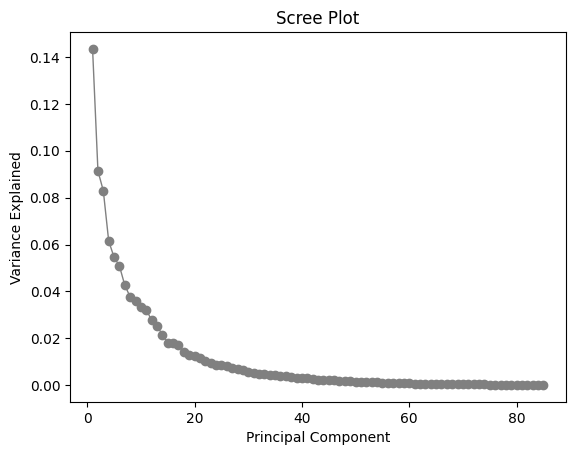

In [21]:
# Scree plot
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=1, color='grey')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

#### Exporting the PCA-ed version of the df

In [17]:
pca_results.to_csv('pca_df.csv',index=False)